Let's make some `watchmaps` for Lasair. Use MOCpy to create the coverage maps

In [1]:
%matplotlib notebook
# following this: 
#  https://cds-astro.github.io/mocpy/examples/user_documentation.html#create-a-moc-from-a-concave-polygon

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle, SkyCoord

from mocpy import MOC, WCS


In [2]:
# lets create a polygon in RA,DEC that defines the ETZ
# First create arrays to hold coordinates in (ecliptic lon, ecliptic lat)
# |elat| <= 0.264deg

# from Wells+2018: https://ui.adsabs.harvard.edu/abs/2018MNRAS.473..345W
LatLim = 0.5279 / 2

Npts = 360
eLon1 = np.linspace(0,360,Npts) * u.deg
eLon2 = eLon1[::-1]

eLat1 = np.ones(Npts) * LatLim * u.deg
eLat2 = eLat1 * -1

dist = np.ones(Npts) * u.kpc

ecoord1 = SkyCoord(eLon1, eLat1, distance=dist, frame='heliocentrictrueecliptic')
ecoord2 = SkyCoord(eLon2, eLat2, distance=dist, frame='heliocentrictrueecliptic')

icrs1 = ecoord1.icrs
icrs2 = ecoord2.icrs

icrs = SkyCoord(np.append(icrs1.ra, icrs2.ra), np.append(icrs1.dec, icrs2.dec), frame='icrs')

<IPython.core.display.Javascript object>


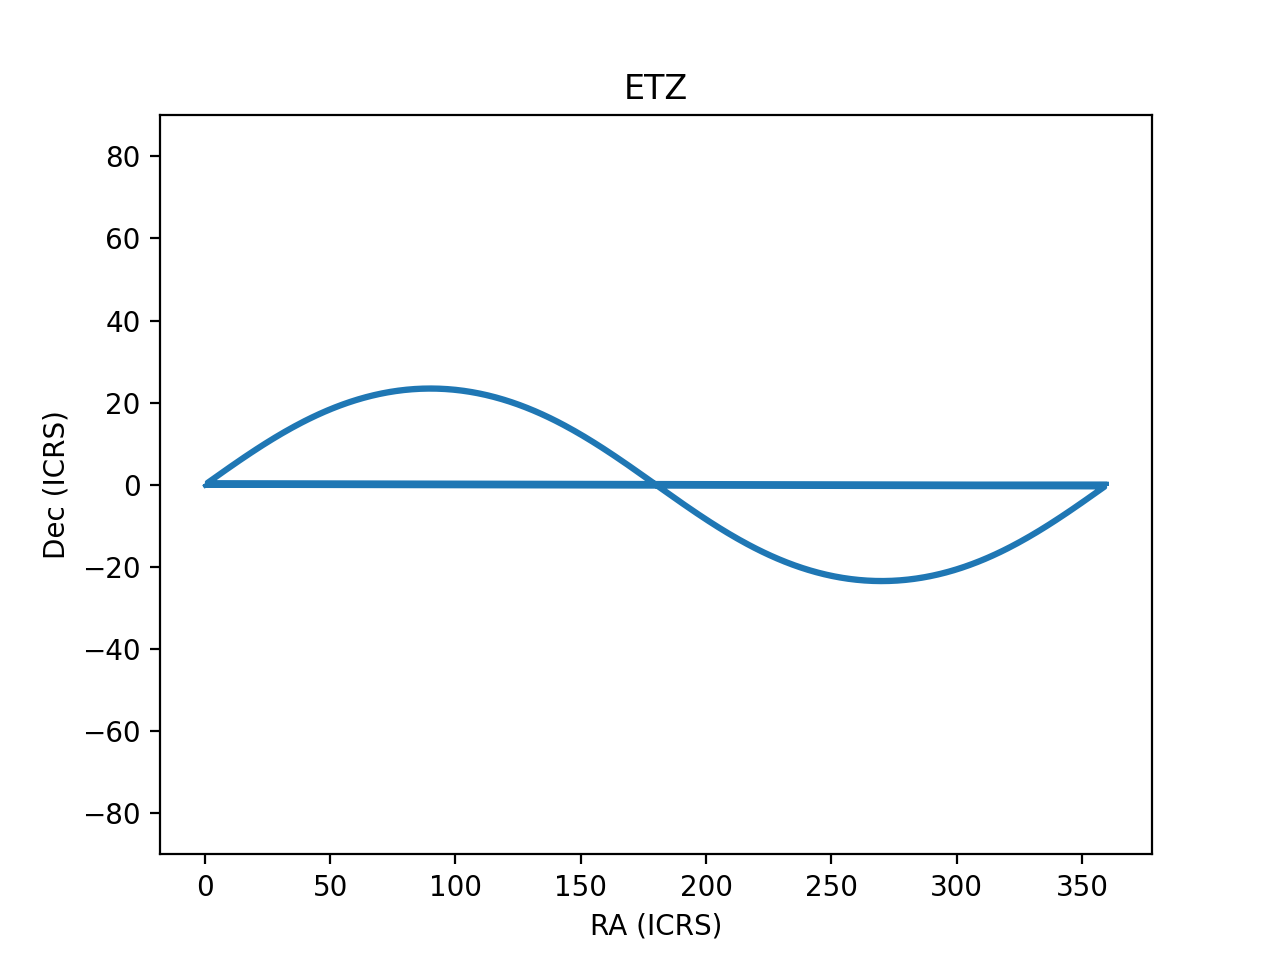

(-90.0, 90.0)

In [3]:
plt.plot(icrs.ra, icrs.dec)
plt.xlabel('RA (ICRS)')
plt.ylabel('Dec (ICRS)')
plt.title('ETZ')
plt.ylim(-90,90)

In [8]:
ETZ = MOC.from_polygon_skycoord(icrs, max_depth=12)
ETZ.save("ETZ_d12.fits", format="fits", overwrite=True)

<IPython.core.display.Javascript object>


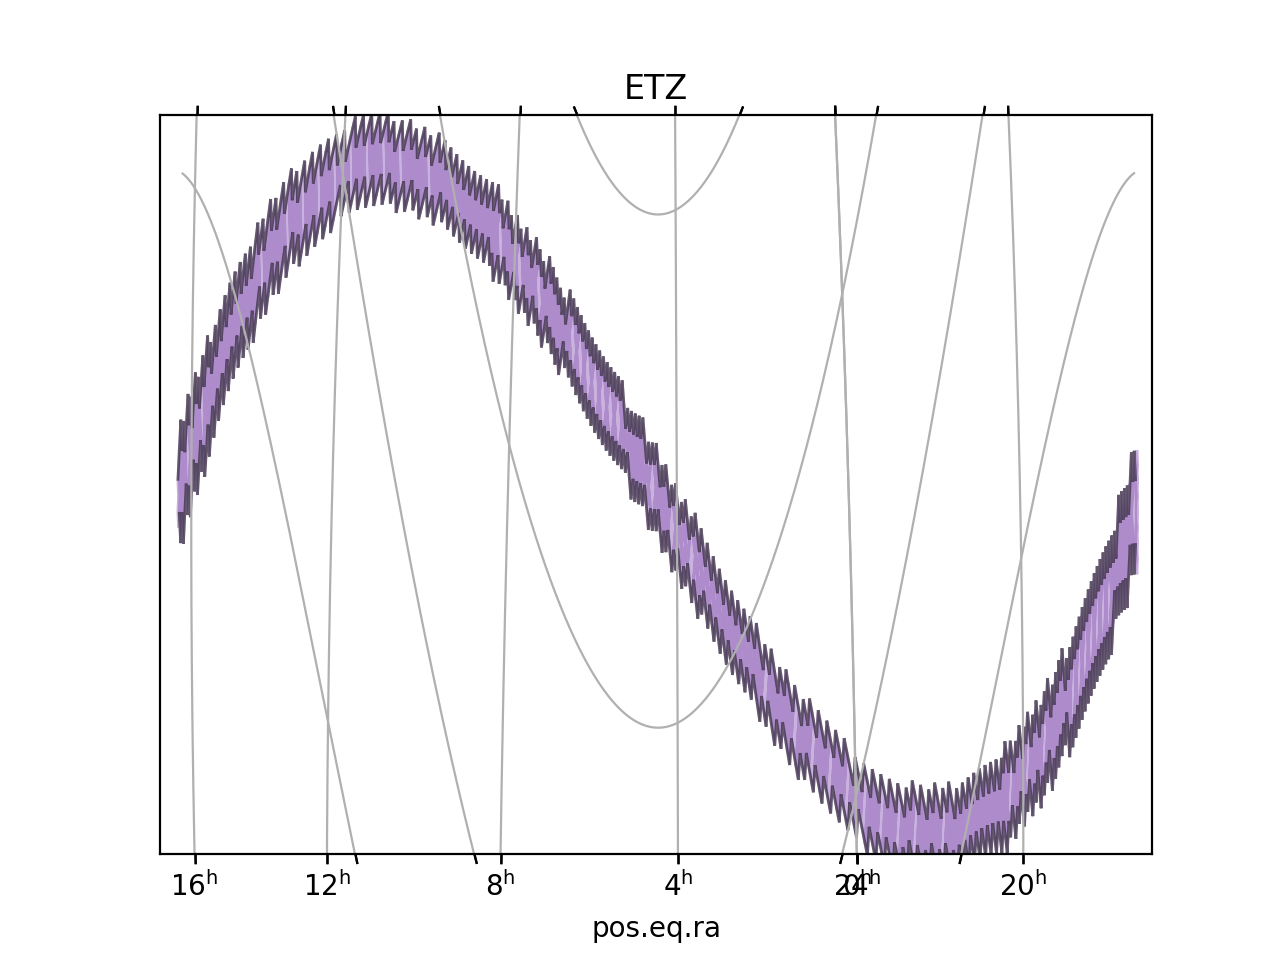

/Users/james/anaconda3/lib/python3.11/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


In [9]:
fig = plt.figure()

wcs = ETZ.wcs(fig, coordsys='icrs')  # automatically creates a wcs for the MOC
ax1 = fig.add_subplot(111, projection=wcs)  # The first of a 2*2 grig of subplots

ETZ.fill(
    ax1,
    wcs,
    color="C4",
    alpha=0.5,
)  # Where the MOC is added to the plot
ax1.set_title("ETZ")

ETZ.border(ax=ax1, wcs=wcs, color="black", alpha=0.5)

ax1.grid(True)


In [ ]:
# This was super easy! map now live at: 
# https://lasair-ztf.lsst.ac.uk/watchmaps/93/